In [1]:
def calculate_percentiles(data):
    """Calculates the P90, P95, and P99 percentiles of an array.

    Args:
      data: The input array.

    Returns:
      A tuple containing the P90, P95, and P99 percentiles, respectively.
    """

    # Sort the data in ascending order
    sorted_data = sorted(data)

    # Calculate the number of elements in the array
    n = len(sorted_data)

    # Calculate the indices for P90, P95, and P99
    p90_index = int(n * 0.9)
    p95_index = int(n * 0.95)
    p99_index = int(n * 0.99)

    # Return the corresponding values from the sorted array
    return sorted_data[p90_index], sorted_data[p95_index], sorted_data[p99_index]

In [2]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np


def save_the_plot(filename: str, http_latency, grp_latency):
    assert len(http_latency) == len(grp_latency) == 3

    mode = ("p90", "p95", "p99")

    latency_p90_p95_p99 = {
        "http": http_latency,
        "gRPC": grp_latency,
    }

    x = np.arange(len(mode))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout="constrained")

    for attribute, measurement in latency_p90_p95_p99.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("latency (time in ms)")
    ax.set_title("latency (lower is better)")
    ax.set_xticks(x + width, mode)
    ax.legend(loc="upper left", ncols=3)
    # ax.set_ylim(0, 250)
    # save the plot
    plt.savefig(filename)

response time for benchmark_results_http_simple_json.csv
	http_p90=200.0
	http_p95=216.0
	http_p99=253.0
response time for benchmark_results_grpc_simple_json.csv
	grpc_p90=178.0
	grpc_p95=202.0
	grpc_p99=290.0



response time for benchmark_results_http_normal_json.csv
	http_p90=199.0
	http_p95=216.0
	http_p99=255.0
response time for benchmark_results_grpc_normal_json.csv
	grpc_p90=187.0
	grpc_p95=219.0
	grpc_p99=382.0



response time for benchmark_results_http_big_json.csv
	http_p90=244.0
	http_p95=271.0
	http_p99=327.0
response time for benchmark_results_grpc_big_json.csv
	grpc_p90=227.0
	grpc_p95=257.0
	grpc_p99=339.0



response time for benchmark_results_http_image.csv
	http_p90=541.0
	http_p95=559.0
	http_p99=599.0
response time for benchmark_results_grpc_image.csv
	grpc_p90=1163.0
	grpc_p95=1202.0
	grpc_p99=1788.0



response time for benchmark_results_http_audio.csv
	http_p90=624.0
	http_p95=654.0
	http_p99=714.0
response time for benchmark_results_grpc_audio.csv
	grpc_p90=184

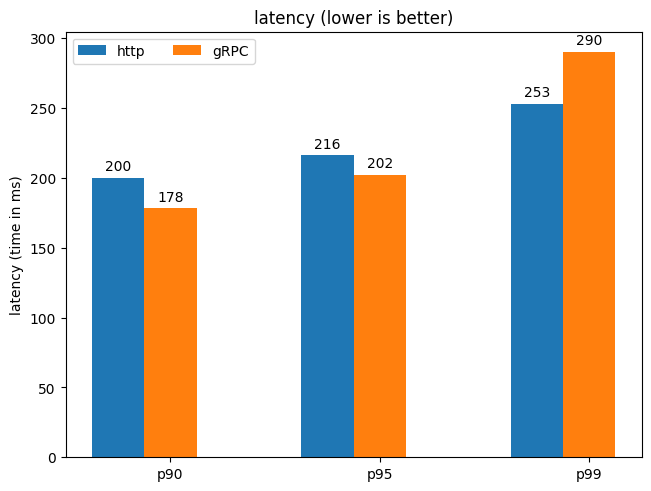

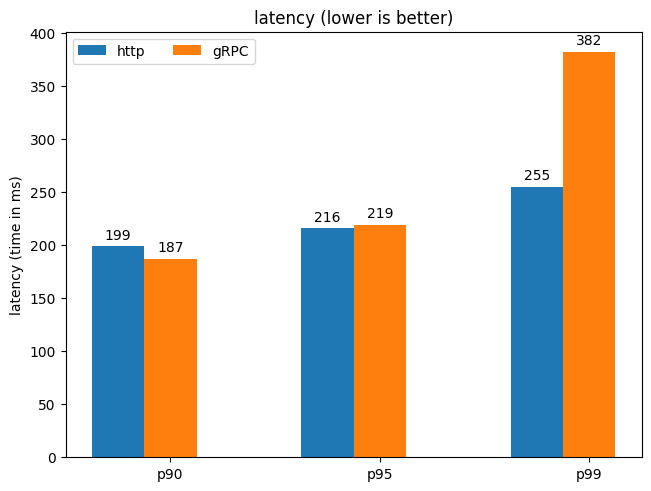

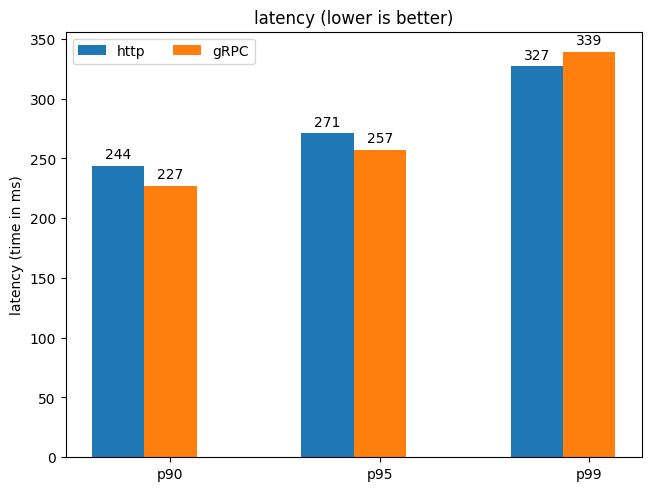

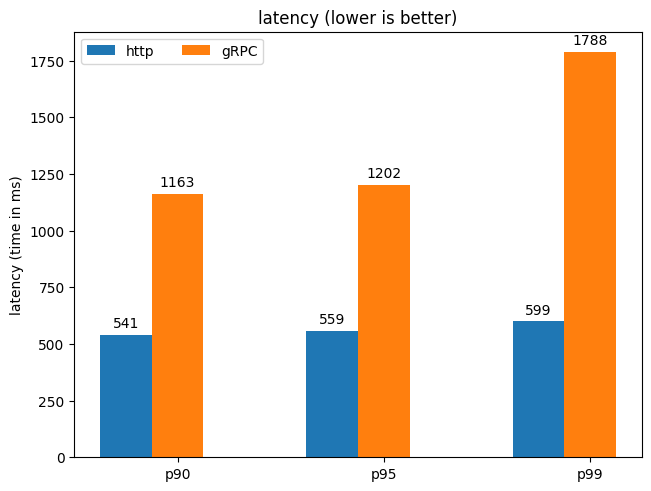

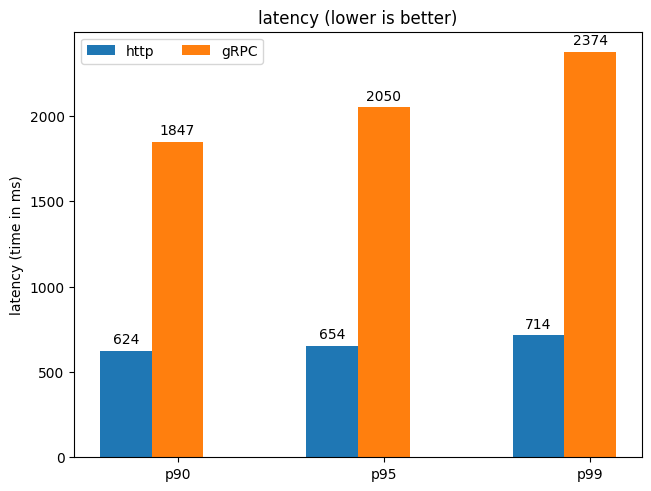

In [3]:
import pandas as pd

http_csv_files = [
    "benchmark_results_http_simple_json.csv",
    "benchmark_results_http_normal_json.csv",
    "benchmark_results_http_big_json.csv",
    "benchmark_results_http_image.csv",
    "benchmark_results_http_audio.csv",
]

grpc_csv_files = [
    "benchmark_results_grpc_simple_json.csv",
    "benchmark_results_grpc_normal_json.csv",
    "benchmark_results_grpc_big_json.csv",
    "benchmark_results_grpc_image.csv",
    "benchmark_results_grpc_audio.csv",
]

for http_csv, grpc_csv in zip(http_csv_files, grpc_csv_files):
    df = pd.read_csv(http_csv)
    response_time = df["ResponseTime(ms)"].values
    http_p90, http_p95, http_p99 = calculate_percentiles(response_time)
    print(f"response time for {http_csv}\n\t{http_p90=}\n\t{http_p95=}\n\t{http_p99=}")
    print("=" * 100)
    df = pd.read_csv(grpc_csv)
    response_time = df["ResponseTime(ms)"].values
    grpc_p90, grpc_p95, grpc_p99 = calculate_percentiles(response_time)
    print(f"response time for {grpc_csv}\n\t{grpc_p90=}\n\t{grpc_p95=}\n\t{grpc_p99=}")
    print("=" * 100)
    print("\n\n")
    http_latency = [http_p90, http_p95, http_p99]
    grpc_latency = [grpc_p90, grpc_p95, grpc_p99]
    save_the_plot(f"plots/{http_csv}-vs-{grpc_csv}.png", http_latency, grpc_latency)

response time for benchmark_results_http_stream_text.csv
	http_p90=556.0
	http_p95=608.0
	http_p99=739.0
response time for benchmark_results_grpc_stream_text.csv
	grpc_p90=790.0
	grpc_p95=847.0
	grpc_p99=948.0



response time for benchmark_results_http_stream_bytes.csv
	http_p90=3398.0
	http_p95=3496.0
	http_p99=3716.0
response time for benchmark_results_grpc_stream_bytes.csv
	grpc_p90=3483.0
	grpc_p95=3604.0
	grpc_p99=3815.0





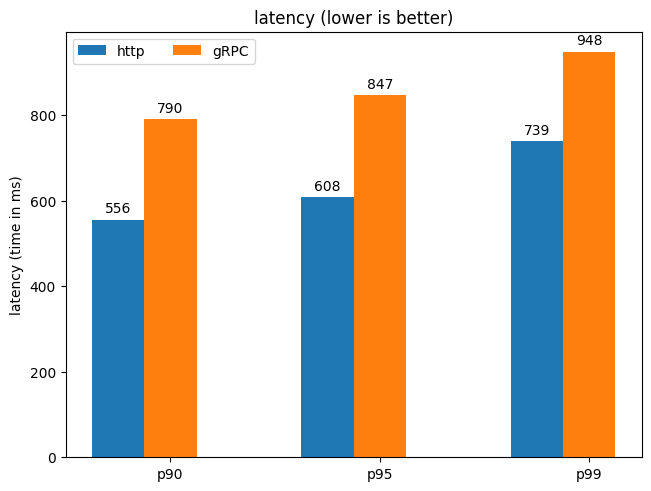

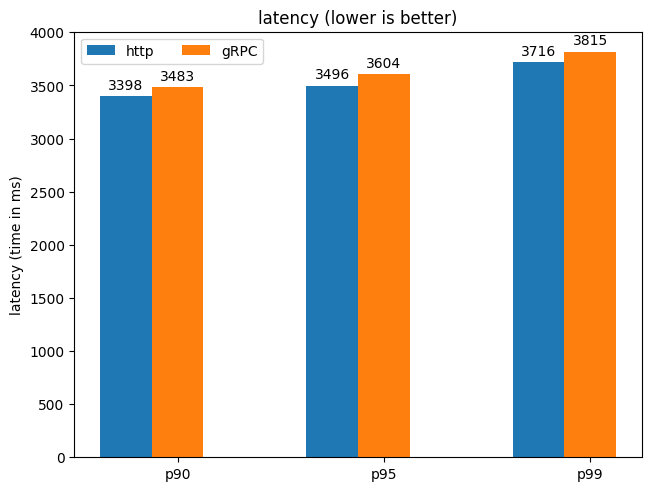

In [4]:
import pandas as pd

http_stream_csv_files = [
    "benchmark_results_http_stream_text.csv",
    "benchmark_results_http_stream_bytes.csv",
]

grpc_stream_csv_files = [
    "benchmark_results_grpc_stream_text.csv",
    "benchmark_results_grpc_stream_bytes.csv",
]


for http_csv, grpc_csv in zip(http_stream_csv_files, grpc_stream_csv_files):
    df = pd.read_csv(http_csv)
    response_time = df["ResponseTime(ms)"].values
    http_p90, http_p95, http_p99 = calculate_percentiles(response_time)
    print(f"response time for {http_csv}\n\t{http_p90=}\n\t{http_p95=}\n\t{http_p99=}")
    print("=" * 100)
    df = pd.read_csv(grpc_csv)
    response_time = df["ResponseTime(ms)"].values
    grpc_p90, grpc_p95, grpc_p99 = calculate_percentiles(response_time)
    print(f"response time for {grpc_csv}\n\t{grpc_p90=}\n\t{grpc_p95=}\n\t{grpc_p99=}")
    print("=" * 100)
    print("\n\n")
    http_latency = [http_p90, http_p95, http_p99]
    grpc_latency = [grpc_p90, grpc_p95, grpc_p99]
    save_the_plot(f"plots/{http_csv}-vs-{grpc_csv}.png", http_latency, grpc_latency)